# Download All State Boundaries

### Import Libraries

In [20]:
import pandas as pd
import geopandas as gpd
import numpy as np
import osmnx as ox
import math
import matplotlib.pyplot as plt
import datetime
import time

from typing import Optional

import censusdis.data as ced
import censusdis.maps as cem
import censusdis.values as cev
import censusdis.geography as cgeo
from censusdis import states
from censusdis.values import ALL_SPECIAL_VALUES
from censusdis.maps import ShapeReader, plot_us_boundary

from matplotlib.ticker import StrMethodFormatter

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
ox.__version__

pd.set_option('display.max_colwidth', 15)
pd.set_option('display.width', 15)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 15)

### Datasets, Variables, and Geographies

In [21]:
DATASET = "acs/acs5"
YEAR = 2020
MEDIAN_HOUSEHOLD_INCOME_VARIABLE = "B19013_001E"
VARIABLES = ["NAME", MEDIAN_HOUSEHOLD_INCOME_VARIABLE]
API_KEY = '781655d3b92f252d48d8acae0f5669dddf3cb9a4'

#Read shapefile for US states
reader = cem.ShapeReader(year=YEAR)
gdf_state_bounds = reader.read_cb_shapefile("us", "state")
gdf_state_bounds = gdf_state_bounds[
    gdf_state_bounds["STATEFP"].isin(states.ALL_STATES_AND_DC)
]

### Plot Function

In [22]:
plt.rcParams["figure.figsize"] = (18, 8)


def plot_map(
    gdf: gpd.GeoDataFrame,
    geo: str,
    *,
    gdf_bounds: Optional[gpd.GeoDataFrame] = None,
    bounds_color: str = "white",
    max_income: float = 200_000.0,
    **kwargs,
):
    """Plot a map."""
    if gdf_bounds is None:
        gdf_bounds = gdf

    ax = cem.plot_us(gdf_bounds, color="lightgray")

    ax = cem.plot_us(
        gdf,
        MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
        cmap="autumn",
        edgecolor="darkgray",
        legend=True,
        vmin=0.0,
        vmax=max_income,
        ax=ax,
        **kwargs,
    )

    ax = cem.plot_us_boundary(gdf_bounds, edgecolor=bounds_color, linewidth=0.5, ax=ax)

    ax.set_title(f"{YEAR} Median Household Income by {geo.title()}")

    ax.axis("off")

## Download Admin Boundaries

### States

In [23]:
gdf_state = ced.download(
    DATASET,
    YEAR,
    VARIABLES,
    state="*",
    with_geometry=True,
    api_key=API_KEY)

gdf_state.head()

,STATE,NAME,B19013_001E,geometry
0,42,Pennsylvania,63627,POLYGON ((-...
1,06,California,78672,MULTIPOLYGO...
2,54,West Virginia,48037,POLYGON ((-...
3,49,Utah,74197,POLYGON ((-...
4,36,New York,71117,MULTIPOLYGO...


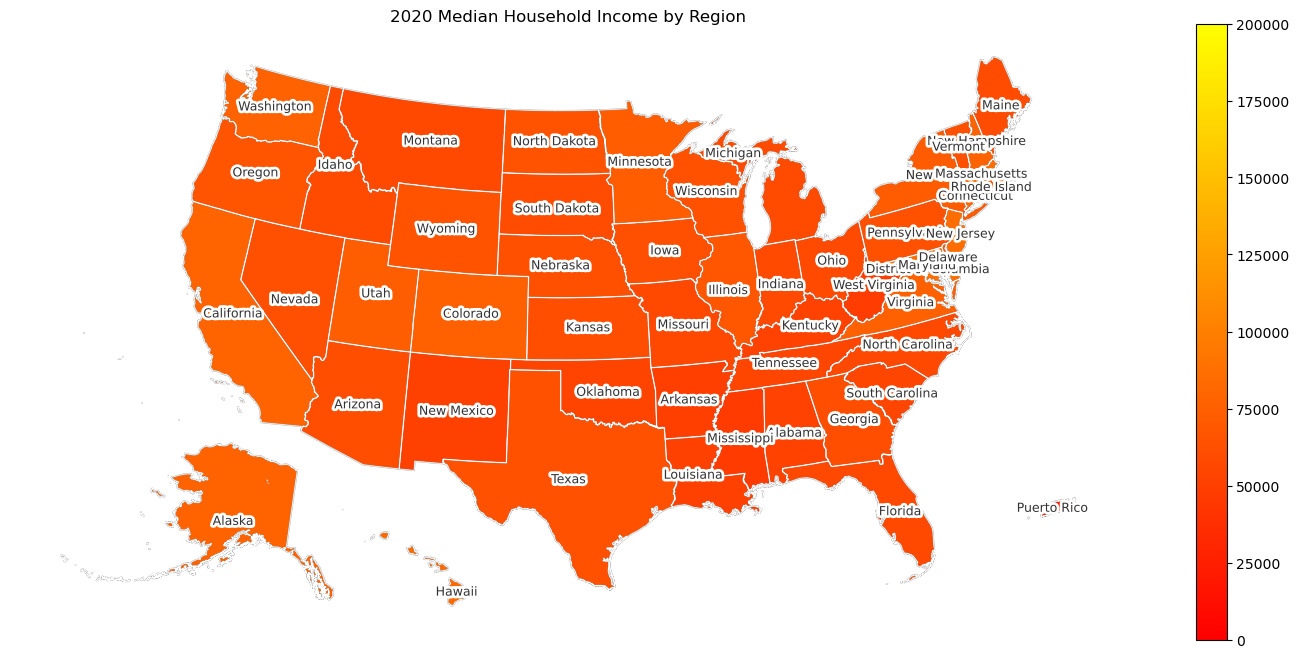

In [24]:
#Plot
plot_map(gdf_state, "region", geo_label="NAME")